<br>
<u>Notebook Eight</u> | 
<a href=https://github.com/andrealeone/NLP target=_blank>Repository</a>
<br><br>
<b>Support Vector Machines</b><br><br>
Andrea Leone<br>
University of Trento<br>
January 2022
<br><br>

In [1]:
import project 

import sklearn
import sklearn.svm


project.notebook()

In [2]:
records = project.sql_query(""" 
    SELECT vector, category FROM talks
    WHERE  vector IS NOT NULL
    ORDER BY slug ASC;
"""); pruning_method = 'LOF'

records = project.prune_outliers(records, pruning_method)

(x, y), (z, t)                       \
    = train_set, test_set            \
    = splits                         \
    = project.split_in_sets( records )

project.describe_sets(splits)

Data reduced from 4710 to 4630 (-1.70%).

train_set  =>  (0, 1370) (1, 1584) (2, 1046) 
test_set   =>  (0,  230) (1,  229) (2,  171) 


<br/>

A **Support Vector Machine** constructs a hyperplane (or set of hyperplanes) in a high dimensional space. A good separation is achieved when the hyperplane maximises the distance to the nearest training data points of any class (so-called functional margin), since the larger the margin the lower the generalization error of the classifier. SVMs have many advantages:  
* They are effective in high dimensional spaces (and remain effective in cases where number of dimensions is greater than the number of samples).
* They use a subset of training points in the decision function (the support vectors), making it is memory efficient too.
* They are also versatile: kernel functions can be specified for the decision function.
* Overfitting can be stemmed with kernel functions or with a regularisation term.

<br/>

### Linear Support Vector Classification

<br>
LinearSVC is a SVM implementation using a linear kernel for classification ([liblinear](https://www.csie.ntu.edu.tw/~cjlin/liblinear/) instead of [libsvm](https://www.csie.ntu.edu.tw/~cjlin/libsvm/)).  
It has more flexibility in the choice of penalties and loss functions and should scale better with a relatively large numbers of samples.<br/>
<br>

In [3]:
lsv = sklearn.svm.LinearSVC(
    penalty='l2', loss='squared_hinge', C=2.0,
    multi_class='ovr', tol=0.0001, max_iter=400,
    fit_intercept=True, intercept_scaling=1,
    class_weight=project.class_weights(y),
    random_state=42
).fit(x,y)

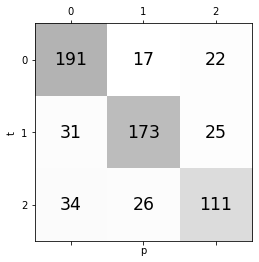

accuracy    0.753968253968254
precision   0.7498504404985153
recall      0.7450053683033607


In [4]:
p = lsv.predict(z)

confusion_matrix          = project.confusion_matrix (t,p)
accuracy,precision,recall = project.present_metrics  (t,p)

<b>score board</b> — LinearSVC<br>
<pre>
pipeline         accuracy  precision recall     cm_d

en_core_web_lg   .74788732 .74379935 .74187827  192 210 129
en_core_web_lg   .75396825 .74985044 .74500536  191 173 111  without outliers (pm=LOF)
en_core_web_lg   .74342105 .73021099 .72560640  115 157  67  without outliers (pm=IF)

en_core_web_trf  .68547249 .70491715 .66850507  179 221  86
en_core_web_trf  .67617449 .67889453 .65841361  168 168  67  without outliers (pm=LOF)
en_core_web_trf  .68322981 .72222222 .67393862   50 115  55  without outliers (pm=IF)

</pre>

<br/>

### C-Support Vector Classifier

<br>
<code>C</code> is the regularization parameter: the strength of the regularization is inversely proportional to its value.<br/> It must be strictly positive. The penalty is a squared l2 penalty.<br/>
<br>

In [5]:
svc = sklearn.svm.SVC(
    C=0.6, kernel='rbf', gamma='scale',
    shrinking=True, probability=False,
    tol=0.0001, decision_function_shape='ovr',
    class_weight=project.class_weights(y),
    random_state=42
).fit(x,y)

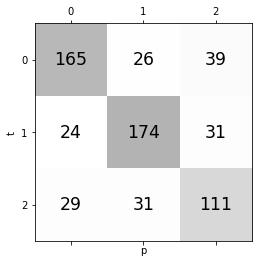

accuracy    0.7142857142857143
precision   0.7077957185666649
recall      0.7087798129587624


In [6]:
p = svc.predict(z)

confusion_matrix          = project.confusion_matrix (t,p)
accuracy,precision,recall = project.present_metrics  (t,p)

<b>score board</b> — SVC<br>
<pre>
pipeline         accuracy  precision recall      cm_d

en_core_web_lg   .69859154 .69541303 .69079272   164 211 121
en_core_web_lg   .71428571 .70779571 .70877981   165 174 111  without outliers (pm=LOF)
en_core_web_lg   .72587719 .71284063 .70696499   110 156  65  without outliers (pm=IF)

en_core_web_trf  .38363892 .47652139 .39770875   131  24 117
en_core_web_trf  .33557046 .41124413 .39959751    51  26 123  without outliers (pm=LOF)
en_core_web_trf  .34782608 .44948247 .39678957    27  30  55  without outliers (pm=IF)

</pre>

<br/>

### Nu-Support Vector Classification

<br>
<code>Nu</code> is an upper bound on the fraction of margin errors and a lower bound of the fraction of support vectors.  Should be in the interval (0, 1].<br/>
<br>

In [7]:
nsv = sklearn.svm.NuSVC(
    nu=0.3, kernel='rbf', gamma='scale',
    shrinking=True, probability=False,
    tol=0.0001, decision_function_shape='ovr',
    class_weight=project.class_weights(y),
    random_state=42
).fit(x,y)

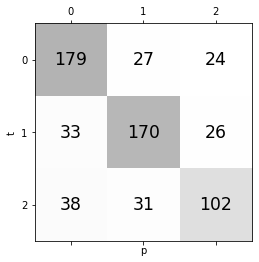

accuracy    0.7158730158730159
precision   0.7108888888888889
recall      0.7057033920793376


In [8]:
p = nsv.predict(z)

confusion_matrix          = project.confusion_matrix (t,p)
accuracy,precision,recall = project.present_metrics  (t,p)

<b>score board</b> — NuSVC<br>
<pre>
pipeline         accuracy  precision recall     cm_d

en_core_web_lg   .73521126 .73076537 .72452168  191 214 117
en_core_web_lg   .71587301 .71088888 .70570339  179 170 102  without outliers (pm=LOF)
en_core_web_lg   .71271929 .69583827 .69366676  113 150  62  without outliers (pm=IF)

en_core_web_trf  .69534555 .69022359 .68204887  201 189 103
en_core_web_trf  .66275167 .64658706 .64513622  130 186  79  without outliers (pm=LOF)
en_core_web_trf  .65527950 .64224054 .64813741   75  91  45  without outliers (pm=IF)

</pre>

<br>